In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
url = 'https://raw.githubusercontent.com/matheusnery/inadimplencia/main/treino.csv'
df = pd.read_csv(url)
print(df.head(5))


   inadimplente  ...  numero_de_dependentes
0             1  ...                    2.0
1             0  ...                    1.0
2             0  ...                    0.0
3             0  ...                    0.0
4             0  ...                    0.0

[5 rows x 11 columns]


In [3]:
df.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [5]:
df.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
df.isnull().sum().sort_values()/df.shape[0]

inadimplente                             0.000000
util_linhas_inseguras                    0.000000
idade                                    0.000000
vezes_passou_de_30_59_dias               0.000000
razao_debito                             0.000000
numero_linhas_crdto_aberto               0.000000
numero_vezes_passou_90_dias              0.000000
numero_emprestimos_imobiliarios          0.000000
numero_de_vezes_que_passou_60_89_dias    0.000000
numero_de_dependentes                    0.026164
salario_mensal                           0.197845
dtype: float64

In [7]:
df.nunique().sort_values()

inadimplente                                 2
numero_de_dependentes                       12
numero_de_vezes_que_passou_60_89_dias       13
vezes_passou_de_30_59_dias                  15
numero_vezes_passou_90_dias                 18
numero_emprestimos_imobiliarios             28
numero_linhas_crdto_aberto                  57
idade                                       86
salario_mensal                           12228
razao_debito                             86002
util_linhas_inseguras                    92671
dtype: int64

In [8]:
df = df.dropna(subset=['numero_de_dependentes'])
df = df.dropna(subset=['salario_mensal'])
df.isnull().sum().sort_values()/df.shape[0]

inadimplente                             0.0
util_linhas_inseguras                    0.0
idade                                    0.0
vezes_passou_de_30_59_dias               0.0
razao_debito                             0.0
salario_mensal                           0.0
numero_linhas_crdto_aberto               0.0
numero_vezes_passou_90_dias              0.0
numero_emprestimos_imobiliarios          0.0
numero_de_vezes_que_passou_60_89_dias    0.0
numero_de_dependentes                    0.0
dtype: float64

In [9]:
df.corr()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
inadimplente,1.000000,-0.003313,-0.101614,0.120566,-0.003468,-0.020271,-0.028284,0.108678,-0.004796,0.092217,0.043802
util_linhas_inseguras,-0.003313,1.000000,-0.003648,-0.001312,0.000162,0.008203,-0.009369,-0.001133,0.007710,-0.001001,-0.001290
idade,-0.101614,-0.003648,1.000000,-0.049433,-0.000732,0.040922,0.188354,-0.048210,0.064601,-0.044073,-0.205649
vezes_passou_de_30_59_dias,0.120566,-0.001312,-0.049433,1.000000,-0.002528,-0.010939,-0.045994,0.976939,-0.025075,0.981316,0.002090
razao_debito,-0.003468,0.000162,-0.000732,-0.002528,1.000000,-0.033734,0.007319,-0.002824,0.020864,-0.002207,0.011803
salario_mensal,-0.020271,0.008203,0.040922,-0.010939,-0.033734,1.000000,0.096490,-0.013725,0.133508,-0.012404,0.066444
numero_linhas_crdto_aberto,-0.028284,-0.009369,0.188354,-0.045994,0.007319,0.096490,1.000000,-0.073729,0.425012,-0.063325,0.038209
numero_vezes_passou_90_dias,0.108678,-0.001133,-0.048210,0.976939,-0.002824,-0.013725,-0.073729,1.000000,-0.041585,0.990137,-0.005713
numero_emprestimos_imobiliarios,-0.004796,0.007710,0.064601,-0.025075,0.020864,0.133508,0.425012,-0.041585,1.000000,-0.034830,0.116759
numero_de_vezes_que_passou_60_89_dias,0.092217,-0.001001,-0.044073,0.981316,-0.002207,-0.012404,-0.063325,0.990137,-0.034830,1.000000,-0.006813


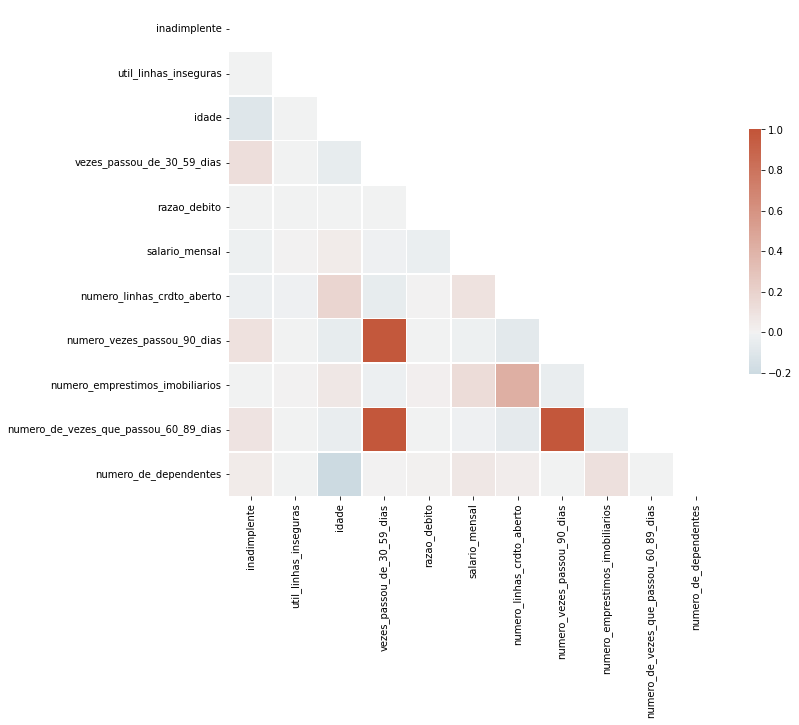

In [10]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
df.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

(array([1.0000e+00, 0.0000e+00, 6.6840e+03, 1.7416e+04, 2.1896e+04,
        2.0321e+04, 1.4784e+04, 5.6070e+03, 1.4400e+03, 8.8000e+01]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <a list of 10 Patch objects>)

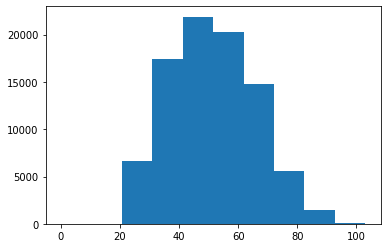

In [12]:
plt.hist(df['idade'])

In [13]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,[0]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_unb = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
scaler_r = StandardScaler()
scaler_r.fit(X)
X_r = scaler_r.transform(X)

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('RndForest', RandomForestClassifier())) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

LR: 0.931752 (0.003206)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

LDA: 0.931378 (0.002885)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

KNN: 0.930562 (0.003366)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecTree: 0.894205 (0.004821)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

NB: 0.928307 (0.003298)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RndForest: 0.933293 (0.002626)


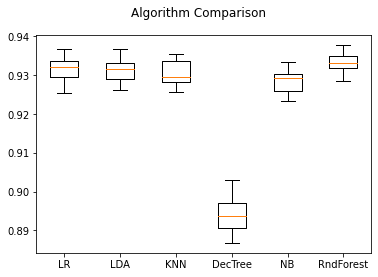

In [19]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X_r, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
results

[array([0.93359021, 0.93540345, 0.9318903 , 0.92543064, 0.93075703,
        0.92860381, 0.93347688, 0.93675621, 0.92916242, 0.93244928]),
 array([0.93325023, 0.93415684, 0.93200363, 0.92622393, 0.92996374,
        0.92871714, 0.93268359, 0.93664287, 0.9288224 , 0.93131588]),
 array([0.92871714, 0.93495014, 0.93381686, 0.9256573 , 0.9281505 ,
        0.92679057, 0.93347688, 0.93539612, 0.92859572, 0.93006914]),
 array([0.88859927, 0.8974388 , 0.89426564, 0.89029918, 0.8961922 ,
        0.88678604, 0.90004533, 0.90298085, 0.89210019, 0.89334693]),
 array([0.9306437 , 0.92962375, 0.92951043, 0.92327743, 0.92373073,
        0.92577063, 0.93234361, 0.933356  , 0.92598889, 0.9288224 ]),
 array([0.93177697, 0.93766999, 0.93495014, 0.92837715, 0.93359021,
        0.93098368, 0.93427017, 0.93675621, 0.93199592, 0.93256262])]

In [21]:
a=0
for i in results:
  
  print(models[a])
  print(i.mean())
  print(i.std())
  a = a+1
  print(" ")

('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))
0.9317520213950825
0.0032062634149928053
 
('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001))
0.9313780233583431
0.002884817129899566
 
('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))
0.9305620360491501
0.0033663479246010134
 
('DecTree', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
               

## Testar Random Forest

In [22]:
clf = RandomForestClassifier(n_estimators=1000)

In [23]:
clf.fit(X_train_unb,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc

In [26]:
print(accuracy_score(pred,y_test))

0.9339949860915553


In [27]:
confusion_matrix=confusion_matrix(y_test,pred)
confusion_matrix

array([[26821,   290],
       [ 1632,   376]])

In [28]:
auc_roc=classification_report(y_test,pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27111
           1       0.56      0.19      0.28      2008

    accuracy                           0.93     29119
   macro avg       0.75      0.59      0.62     29119
weighted avg       0.92      0.93      0.92     29119



In [29]:
auc_roc=roc_auc_score(y_test,pred)
auc_roc

0.5882771154326297

In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5882771154326297

Text(0.5, 0, 'False Positive Rate')

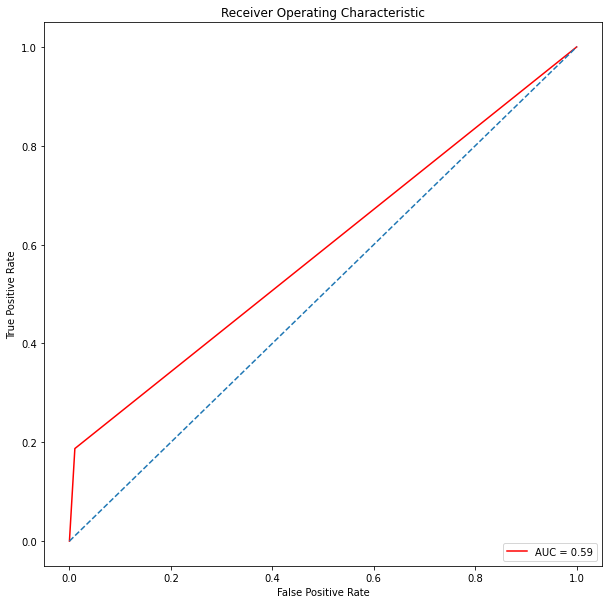

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Testa Regressão Logistica

In [32]:
clf_lr = LogisticRegression()

In [33]:
clf_lr.fit(X_train_unb, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred = clf_lr.predict(X_test)

In [35]:
y_test = pd.DataFrame(y_test)

In [36]:
print(type(pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [37]:
pred = pd.DataFrame(pred)

In [38]:
print(accuracy_score(pred,y_test))

0.9313506645145782


In [39]:
auc_roc=classification_report(y_test,pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27111
           1       0.53      0.03      0.07      2008

    accuracy                           0.93     29119
   macro avg       0.73      0.52      0.51     29119
weighted avg       0.91      0.93      0.90     29119



In [40]:
auc_roc=roc_auc_score(y_test,pred)
auc_roc

0.5163052742737876

In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5163052742737876

Text(0.5, 0, 'False Positive Rate')

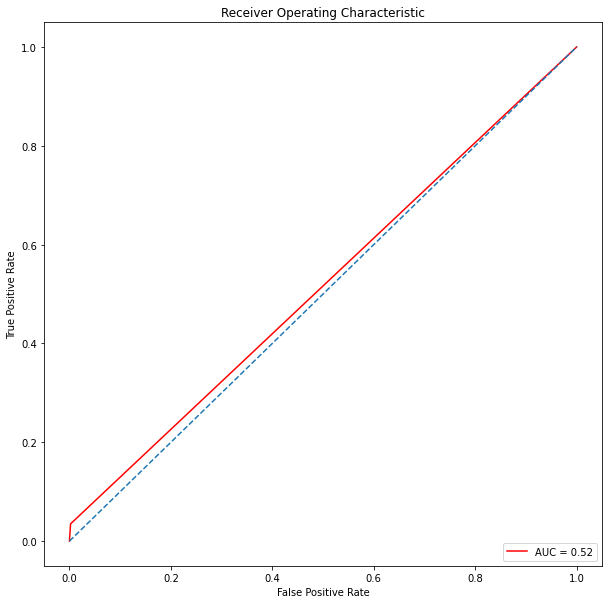

In [42]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Testar Gaussian

In [43]:
clf_GNB = GaussianNB()

In [44]:
clf_GNB.fit(X_train_unb, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
pred = clf_GNB.predict(X_test)

In [46]:
print(accuracy_score(pred,y_test))

0.9270579346818228


In [47]:
auc_roc=classification_report(y_test,pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     27111
           1       0.25      0.03      0.05      2008

    accuracy                           0.93     29119
   macro avg       0.59      0.51      0.51     29119
weighted avg       0.89      0.93      0.90     29119



In [48]:
auc_roc=roc_auc_score(y_test,pred)
auc_roc

0.5112332015304941

In [49]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5112332015304941

Text(0.5, 0, 'False Positive Rate')

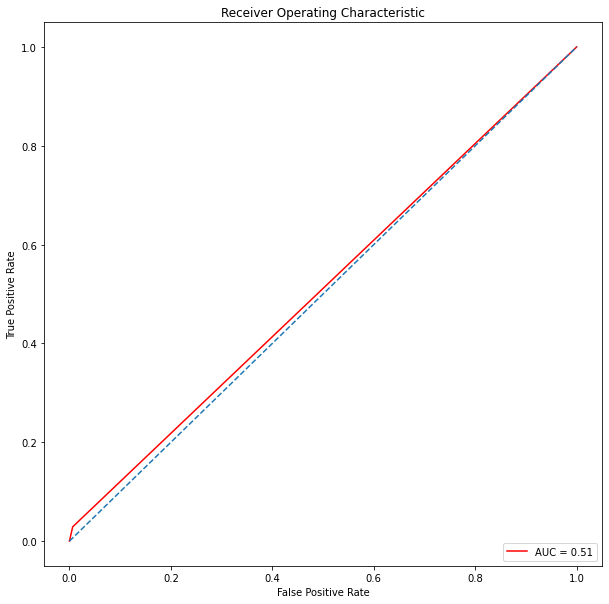

In [50]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

 O Modelo teve como parâmetro de comparação a ROC_AUC com o objetivo do modelo ter uma capacidade de separabilidade entre as classes.
O modelo que melhor se adequou foi a Random Forest, alcançando uma ROC_AUC de 0.5867

In [51]:
url = 'https://raw.githubusercontent.com/matheusnery/inadimplencia/main/teste.csv'
df_test = pd.read_csv(url)
df_test.head(5)

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


In [52]:
df_test.describe()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,40000.000000,40000.000000,40000.000000,40000.000000,3.203200e+04,40000.000000,40000.000000,40000.000000,40000.000000,38954.000000
mean,6.374199,52.404025,0.412725,348.004166,6.760602e+03,8.472525,0.255025,1.013700,0.230750,0.756508
std,242.617247,14.781468,4.057899,1934.436246,1.683639e+04,5.164960,4.034327,1.112494,4.017506,1.116244
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029362,41.000000,0.000000,0.175360,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.149491,52.000000,0.000000,0.366172,5.409500e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.549762,63.000000,0.000000,0.872253,8.284000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,22000.000000,109.000000,98.000000,307001.000000,1.794060e+06,57.000000,98.000000,25.000000,98.000000,13.000000


In [53]:
df_test.isnull().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

In [54]:

df_test['numero_de_dependentes'].fillna(value=df_test['numero_de_dependentes'].mean(), inplace=True)
df_test['salario_mensal'].fillna(value=df_test['salario_mensal'].mean(), inplace=True)


In [55]:
df_test.isnull().sum()

util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [56]:
scaler_model = StandardScaler()
scaler_model.fit(X)
X_train = scaler_model.transform(X)
# y

In [57]:
X_test = scaler_model.transform(df_test)

In [58]:
clf_model = RandomForestClassifier(n_estimators=1000, random_state=7)

In [59]:
clf_model.fit(X_train,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [60]:
pred_model = pd.DataFrame(clf_model.predict(X_test))

In [61]:
pred_model.describe()

,0
count,40000.000000
mean,0.022750
std,0.149107
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
